##Trabalhando com a dataset IRIS 

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_df = sns.load_dataset('iris')
iris_df.head()
#iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##Observar a quantidade de elementos de cada classe

In [3]:
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


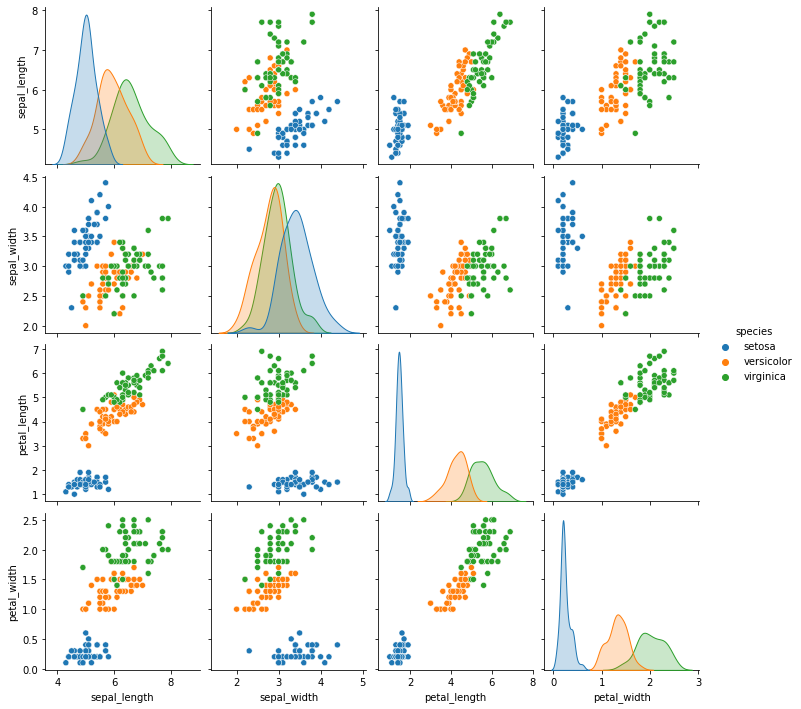

In [5]:
sns.pairplot(iris_df, hue='species')

##Fit do modelo da árvore de decisão

In [7]:
X = iris_df.iloc[:, 2:4]
y = iris_df.species

In [8]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
petal_size = 6
petal_width = 1.2

tree_clf.predict([
    [petal_size, petal_width]                  
])

array(['versicolor'], dtype=object)

##Let's see the tree

In [10]:
!pip install pydotplus

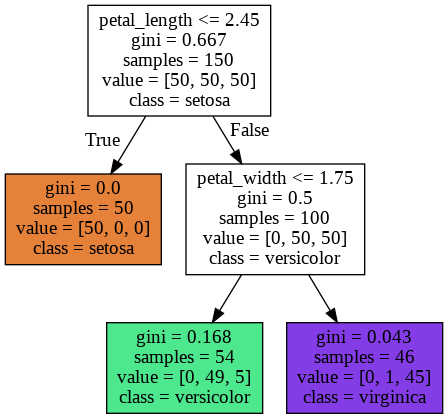

In [14]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

classes = iris_df.species.unique()

export_graphviz(
    tree_clf,
    out_file = dot_data,
    filled= True,
    feature_names = iris_df.columns[2:4],
    class_names = classes
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##Check out contour plot

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

def plot_countour(depth = 2):

  iris = load_iris()
  X = iris.data[:, 2:]
  y = iris.target

  tree_clf = DecisionTreeClassifier(max_depth= depth)
  tree_clf.fit(X, y)

  n_classes = 3
  plot_colors = 'ryb'
  plot_step = 0.02

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  
  Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)

  plt.xlabel(iris.feature_names[2])
  plt.ylabel(iris.feature_names[3])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=20)
    
    plt.suptitle("Decision surface of a decision tree using paires features")
    plt.legend(loc= 'lower right')

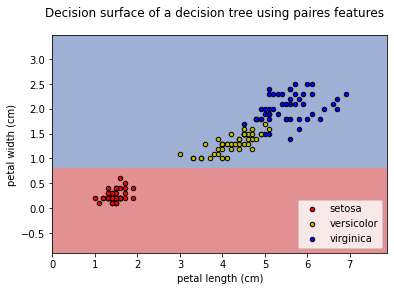

In [25]:
plot_countour(depth=1)

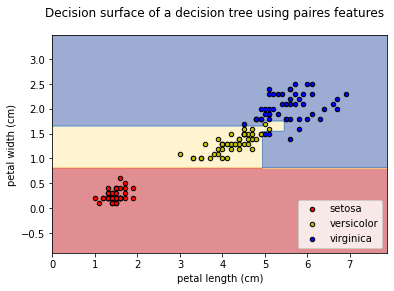

In [26]:
plot_countour(depth=10)

##Estimando probabilidade de classes

In [29]:
petal_lenght = 2.5
petal_width = 1.8

probs = tree_clf.predict_proba([[petal_lenght, petal_width]])
print(probs)
print(classes)

[[0.         0.02173913 0.97826087]]
['setosa' 'versicolor' 'virginica']


Text(0, 0.5, 'Probabilities')

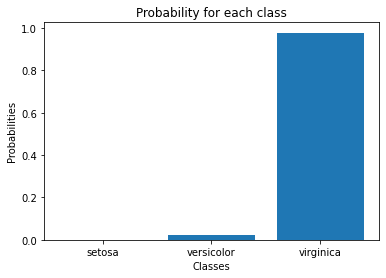

In [30]:
values = probs[0]
plt.bar(classes,values)
plt.title('Probability for each class')

plt.xlabel("Classes")
plt.ylabel("Probabilities")

## Impureza Gini

In [32]:
g_1 = 1-(0/50)**2 - (49/50)**2 - (1/50)**2
g_1

0.03920000000000008